In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
path = '/content/gdrive/My Drive/BTP - 7 Sem/mitbih_database/'

X = list()
y = list()

In [3]:
# Read files
filenames = next(os.walk(path))[2]

# Split and save .csv , .txt 
records = list()
annotations = list()
filenames.sort()

In [4]:
# Extrating filenames and annonations
for f in filenames:
    filename, file_extension = os.path.splitext(f)
    
    # If the file is saved with .csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # If the file is saved with .txt
    else:
        annotations.append(path + filename + file_extension)


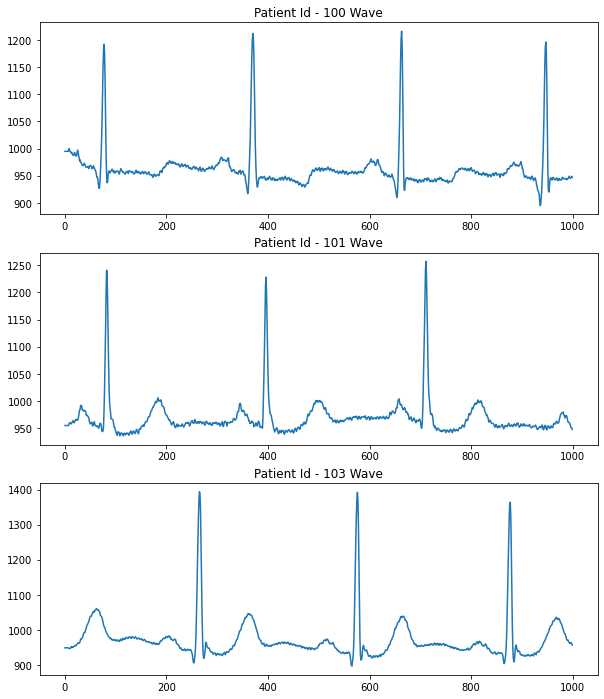

In [5]:
import csv

# Records

signals1 = []
signals2 = []
signals3 = []

# Reading and Storing patients signal in signals 1,2 and 3 array.
with open(records[0], 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
    row_index = -1
    for row in spamreader:
        if(row_index >= 0):
          signals1.insert(row_index, int(row[1]))
        row_index += 1

with open(records[1], 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
    row_index = -1
    for row in spamreader:
        if(row_index >= 0):
          signals2.insert(row_index, int(row[1]))
        row_index += 1

with open(records[3], 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
    row_index = -1
    for row in spamreader:
        if(row_index >= 0):
          signals3.insert(row_index, int(row[1]))
        row_index += 1


# Plotting patient's signal
def plot_signals(signals1, signals2, signals3):
    plt.rcParams["figure.figsize"] = (10,12)
    # Plot patient with Id 100 signal
    plt.subplot(3,1,1)
    plt.title("Patient Id - 100 Wave")
    plt.plot(signals1[0:1000])
    # Plot patient with Id 101 signal
    plt.subplot(3,1,2)
    plt.title("Patient Id - 101 Wave")
    plt.plot(signals2[0:1000])
    # Plot patient with Id 103 signal
    plt.subplot(3,1,3)
    plt.title("Patient Id - 103 Wave")
    plt.plot(signals3[0:1000])
    plt.show()  


plot_signals(signals1, signals2, signals3)


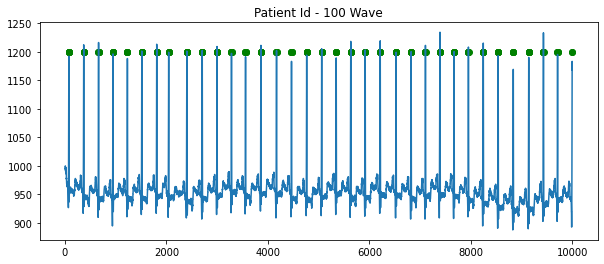

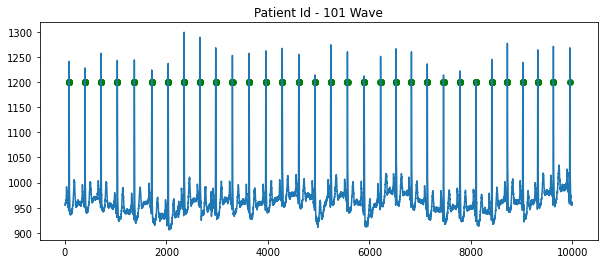

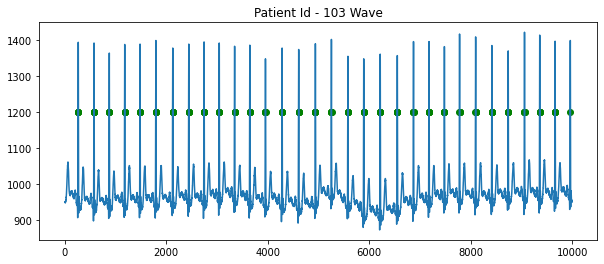

In [6]:
def detect_peaks(ecg_signal, threshold=0.3, qrs_filter=None):
    '''
    Peak detection algorithm using qrs filter, cross correlation and threshold
    '''
    if qrs_filter is None:
        # Created a sine function to find correlation values which can also be
        # termed as qrs filter
        qrs_filter = np.sin(np.linspace(1.5 * np.pi, 3.5 * np.pi, 15))
    signal = ecg_signal

    # normalize the signal data using formulae : (value - mean) / (standard deviation)
    mn = np.mean(ecg_signal)
    stdev = np.std(ecg_signal)
    ecg_signal = (ecg_signal - mn) / stdev

    # Calculating cross correlated values for the signal
    similarity = np.correlate(ecg_signal, qrs_filter, mode="same")
    similarity = similarity / np.max(similarity)

    # If the values id above threshold then identify it as a peak and store in
    # the array with y-axis as 1200
    X = []
    Y = []
    for i in range(0,len(ecg_signal)-1):
      if similarity[i] > threshold:
        X.insert(i,i)
        Y.insert(i,1200)
    
    # returning peaks
    return X, Y, similarity

X1, Y1, similarity1 = detect_peaks(signals1[0:])
X2, Y2, similarity2 = detect_peaks(signals2[0:])
X3, Y3, similarity3 = detect_peaks(signals3[0:])

# Plotting peaks of each patients
plt.rcParams["figure.figsize"] = (10,4)
plt.plot(X1[0:195],Y1[0:195],'go')
plt.plot(signals1[0:10000])
plt.title("Patient Id - 100 Wave")
plt.show()

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(X2[0:160],Y2[0:160],'go')
plt.plot(signals2[0:10000])
plt.title("Patient Id - 101 Wave")
plt.show()

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(X3[0:165],Y3[0:165],'go')
plt.plot(signals3[0:10000])
plt.title("Patient Id - 103 Wave")
plt.show()

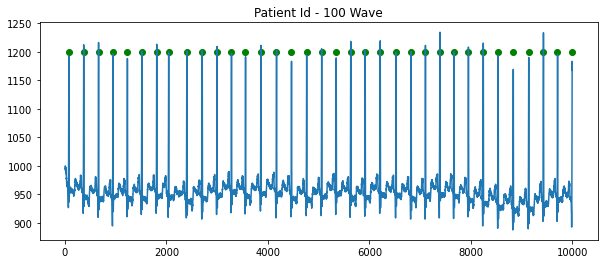

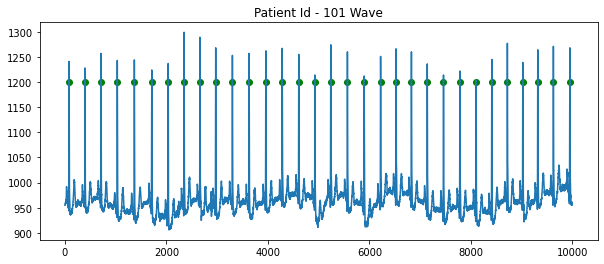

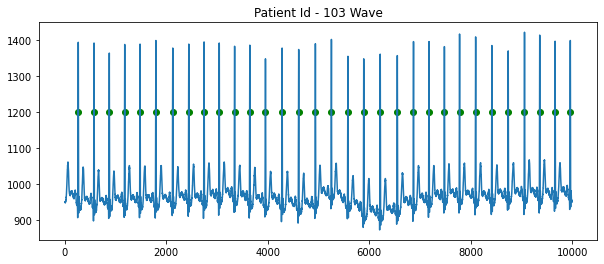

In [7]:
import statistics
def group_peaks(p, threshold=5):
    '''
    The above mentioned process i.e. using cross correlation and threshold, we
    have detected the peaks, but that will return multiple peaks, hence we are 
    grouping the peaks that are very near to each other and replacing them with
    the median value of that group.
    '''
    # initialize output
    output_X = []
    output_Y = []
    temp_X = []
    j = 0
    for i in range(0,len(p)-1):
      '''
      Checking if the diffference between peaks is greter than threshold, if it
      is less than threshold than consider it as a part of group.
      '''
      if p[i+1] - p[i] < threshold:
        temp_X.insert(j,p[i])
        j = j+1
      elif len(temp_X) > 0:
        a = int(statistics.median(temp_X))
        output_X.insert(a,a)
        output_Y.insert(a,1200)
        temp_X = []
        j=0;
    # Replacing group with median using statistics library
    a = int(statistics.median(temp_X))
    output_X.insert(a,a)
    output_Y.insert(a,1200)

    return output_X, output_Y

x1,y1 = group_peaks(X1)
x2,y2 = group_peaks(X2)
x3,y3 = group_peaks(X3)

# Plotting the grouped peak of each group

plt.plot(x1[0:35],y1[0:35],'go')
plt.plot(signals1[0:10000])
plt.title("Patient Id - 100 Wave")
plt.show()

plt.plot(x2[0:32],y2[0:32],'go')
plt.plot(signals2[0:10000])
plt.title("Patient Id - 101 Wave")
plt.show()

plt.plot(x3[0:32],y3[0:32],'go')
plt.plot(signals3[0:10000])
plt.title("Patient Id - 103 Wave")
plt.show()

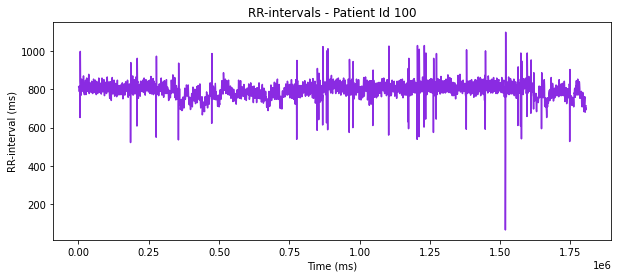

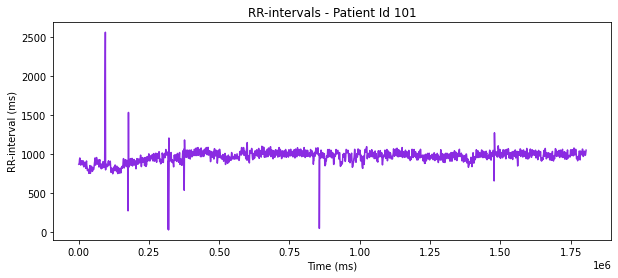

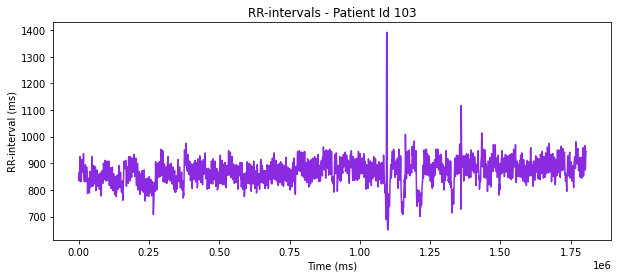

In [8]:
from scipy.stats import zscore
'''
sampling frequency = 360 samples per second
Time period between each sample = 1/360 = 0.00277777777 s = 2.77777777 ms
difference between rr_peaks (time) = (x[i+1] - x[i]) * 2.77777777 ms
'''
def find_rr(p):
  output = []
  for i in range(0,len(p)-1):
    a = p[i+1] - p[i]
    a = a*2.7777777
    output.insert(i,a)
  
  return output

rr1 = find_rr(x1)
rr2 = find_rr(x2)
rr3 = find_rr(x3)

# Plot between R-R intervals' sum on x-axis and R-R intervals on y-axis.
plt.figure(figsize=(10, 4))
plt.title("RR-intervals - Patient Id 100")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")
plt.plot(np.cumsum(rr1), rr1, label="RR-interval", color='blueviolet')

plt.figure(figsize=(10, 4))
plt.title("RR-intervals - Patient Id 101")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")
plt.plot(np.cumsum(rr2), rr2, label="RR-interval", color='blueviolet')

plt.figure(figsize=(10, 4))
plt.title("RR-intervals - Patient Id 103")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")
plt.plot(np.cumsum(rr3), rr3, label="RR-interval", color='blueviolet')


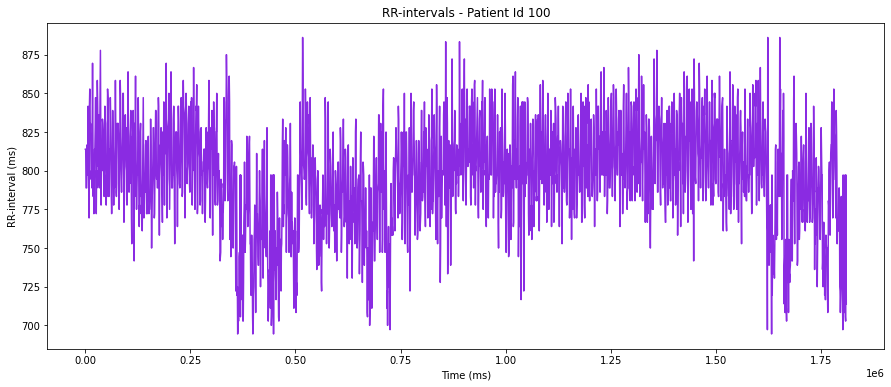

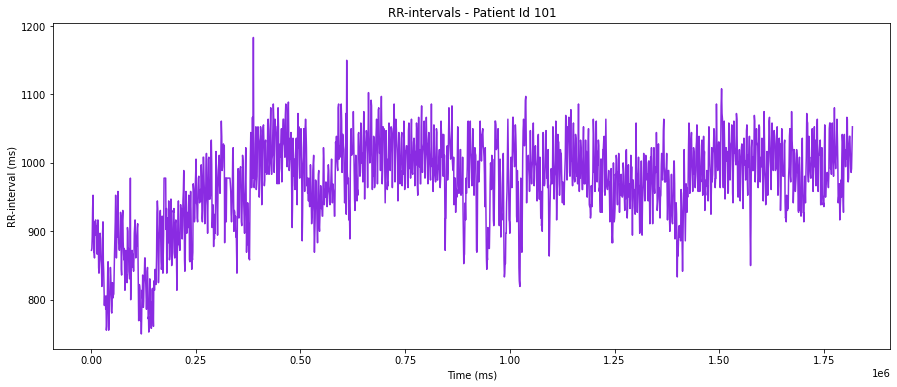

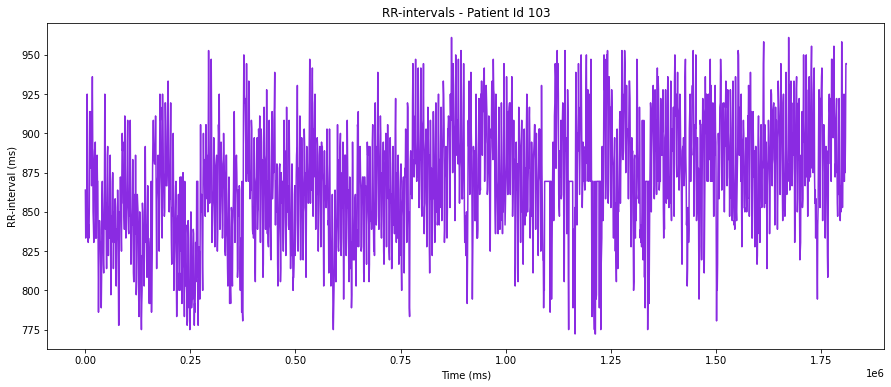

In [9]:
'''
From the above plots, we saw that there are some outliers that may be because the
peak detection algorithm missed any peak resulting in larger interval. 
Hence we have corrected the intervals using zscore. If the zscore value is 
greater than 2, the outlier is expected and removed with median.
'''
def rr_corrected(rr):
  rr_p = np.abs(zscore(rr))
  output = rr
  for i in range(0,len(rr_p)):
    #print(rr[i])
    if(rr_p[i]>2):
      output[i] = np.median(rr)
    else:
     output[i] = rr[i]

  return output

rr_peaks1 = rr_corrected(rr1)
rr_peaks2 = rr_corrected(rr2)
rr_peaks3 = rr_corrected(rr3)

# Plot of R-R intervals (corrected) sum with R-R intervals.
plt.figure(figsize=(15, 6))
plt.title("RR-intervals - Patient Id 100")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")
plt.plot(np.cumsum(rr_peaks1), rr_peaks1, label="RR-interval", color='blueviolet')

plt.figure(figsize=(15, 6))
plt.title("RR-intervals - Patient Id 101")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")
plt.plot(np.cumsum(rr_peaks2), rr_peaks2, label="RR-interval", color='blueviolet')

plt.figure(figsize=(15, 6))
plt.title("RR-intervals - Patient Id 103")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")
plt.plot(np.cumsum(rr_peaks3), rr_peaks3, label="RR-interval", color='blueviolet')

In [10]:
# Calculation of Time domain features.
def timedomain(rr):
    results = {}
    hr = []
    # Calculation of heart rate i.e. 60,000 / R-R in beats/min
    for i in range(0,len(rr)):
      a = 60000/rr[i]
      hr.insert(i,a)
    
    results['R-R mean (ms)'] = np.mean(rr)
    results['Standard deviation of RR or SDNN (ms)'] = np.std(rr)
    results['Mean value of HR (Kubios\' style) (beats/min)'] = 60000/np.mean(rr)
    results['Mean value of HR HR (beats/min)'] = np.mean(hr)
    results['Standard deviation of HR (beats/min)'] = np.std(hr)
    results['Minimum value of HR (beats/min)'] = np.min(hr)
    results['Maximum value of HR (beats/min)'] = np.max(hr)
    results['Root mean square of successive deviation RMSSD (ms)'] = np.sqrt(np.mean(np.square(np.diff(rr))))
    results['NN50'] = np.sum(np.abs(np.diff(rr)) > 50)*1
    results['pNN50 (%)'] = 100 * np.sum((np.abs(np.diff(rr)) > 50)*1) / len(rr)
    return results

print("Time domain features: Patient Id 100")
for i, j in timedomain(rr_peaks1).items():
    print("- %s: %.2f" % (i, j))

print(" ")

print("Time domain features: Patient Id 101")
for i, j in timedomain(rr_peaks2).items():
    print("- %s: %.2f" % (i, j))

print(" ")

print("Time domain features: Patient Id 103")
for i, j in timedomain(rr_peaks3).items():
    print("- %s: %.2f" % (i, j))

Time domain features: Patient Id 100
- R-R mean (ms): 795.95
- Standard deviation of RR or SDNN (ms): 34.27
- Mean value of HR (Kubios' style) (beats/min): 75.38
- Mean value of HR HR (beats/min): 75.52
- Standard deviation of HR (beats/min): 3.32
- Minimum value of HR (beats/min): 67.71
- Maximum value of HR (beats/min): 86.40
- Root mean square of successive deviation RMSSD (ms): 29.02
- NN50: 156.00
- pNN50 (%): 6.86
 
Time domain features: Patient Id 101
- R-R mean (ms): 968.13
- Standard deviation of RR or SDNN (ms): 65.75
- Mean value of HR (Kubios' style) (beats/min): 61.98
- Mean value of HR HR (beats/min): 62.28
- Standard deviation of HR (beats/min): 4.53
- Minimum value of HR (beats/min): 50.70
- Maximum value of HR (beats/min): 80.00
- Root mean square of successive deviation RMSSD (ms): 39.41
- NN50: 363.00
- pNN50 (%): 19.33
 
Time domain features: Patient Id 103
- R-R mean (ms): 869.63
- Standard deviation of RR or SDNN (ms): 37.65
- Mean value of HR (Kubios' style) (bea

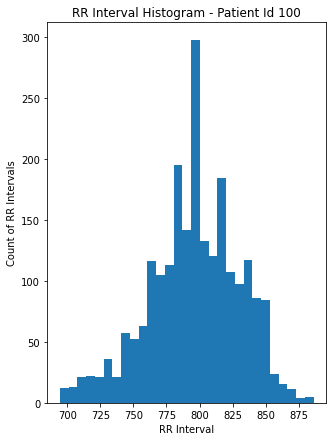

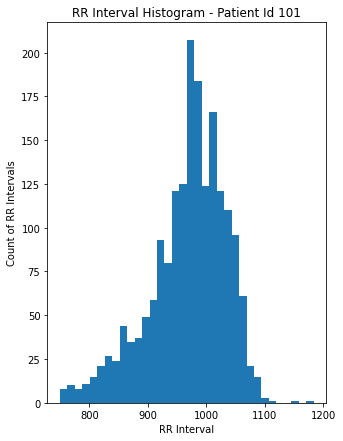

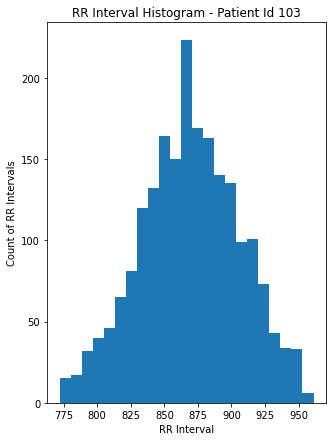

In [11]:
'''
R-R histogram plot
This plot gives us the idea of R-R interval distribution.
The x-axis represents the R-R interval in ms and y-axis represents
the count of R-R intervals.
'''
def plotRRintHist(RRints,i):
    plt.figure(figsize=(5, 7))    
    plt.hist(RRints, bins = 'auto')
    plt.xlabel('RR Interval')
    plt.ylabel('Count of RR Intervals')
    if i == 1:
      plt.title('RR Interval Histogram - Patient Id 100')
    elif i == 2:
      plt.title('RR Interval Histogram - Patient Id 101')
    elif i == 3:
      plt.title('RR Interval Histogram - Patient Id 103')
    plt.show()

plotRRintHist(rr_peaks1, 1)
plotRRintHist(rr_peaks2, 2)
plotRRintHist(rr_peaks3, 3)


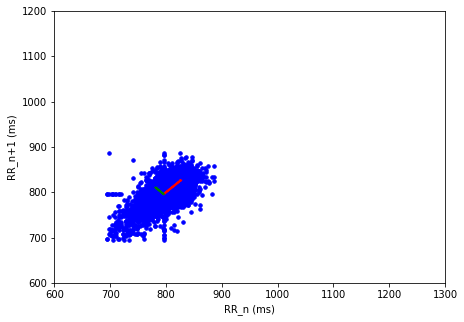

20.520415683110073
43.877209950689746


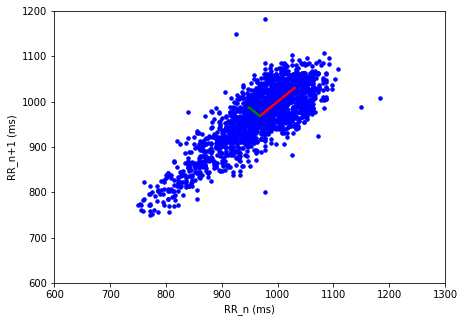

27.868079996101176
88.68573033434824


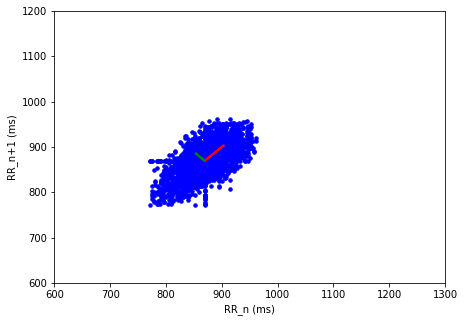

23.11453763570631
47.95373885279063


In [12]:
'''
Non Linear Method - Poincare Plot
The Poincare plot, a nonlinear tool, depicts the nature of R-R interval variations. 
Each R-R interval is represented as a function of the prior R-R interval in this
plot. 
Further standard deviation 1 and 2 are calculated to get idea of short and long
term variability of R-R intervals.
'''
def plotPoincare(RRints,i):
    ax1 = RRints[:-1]
    ax2 = RRints[1:]
    diff = []
    sum = []
    for i in range(0,len(ax1)):
      diff.insert(i, ax2[i]-ax1[i])
      sum.insert(i,ax2[i]+ax1[i])
    sd1 = np.sqrt(0.5) * np.std(diff)
    sd2 = np.sqrt(0.5) * np.std(sum)  
    m = np.mean(RRints)
    plt.figure(figsize=(7, 5))
    if i == 1:
      plt.title('Poincare Plot - Patient Id 100')
    elif i == 2:
      plt.title('Poincare Plot - Patient Id 101')
    elif i == 3:
      plt.title('Poincare Plot - Patient Id 103')
    plt.arrow(m, m, sd2 * np.sqrt(0.5), sd2 * np.sqrt(0.5), color="red", linewidth=2)
    plt.arrow(m, m, -sd1 * np.sqrt(0.5), sd1 * np.sqrt(0.5), color="green", linewidth=2)
    plt.scatter(ax1, ax2, c = 'b', s = 12)
    plt.xlim(600,1300)
    plt.ylim(600,1200)
    plt.xlabel('RR_n (ms)')
    plt.ylabel('RR_n+1 (ms)')
    plt.show()
    return sd1, sd2

# Plotting of Poincare geometry of each patient's with standard deviation
sd1, sd2 = plotPoincare(rr_peaks1, 1)
print(sd1)
print(sd2)

sd1, sd2 = plotPoincare(rr_peaks2, 2)
print(sd1)
print(sd2)

sd1, sd2 = plotPoincare(rr_peaks3, 3)
print(sd1)
print(sd2)

In [13]:
'''
Welch's method can not be applied to not evenly sampled data. Hence
resampling the data.
'''
from scipy.interpolate import interp1d
x1 = np.cumsum(rr_peaks1) / 1000.0
f1 = interp1d(x1, rr_peaks1, kind='cubic')

x2 = np.cumsum(rr_peaks2) / 1000.0
f2 = interp1d(x2, rr_peaks2, kind='cubic')

x3 = np.cumsum(rr_peaks3) / 1000.0
f3 = interp1d(x3, rr_peaks3, kind='cubic')

# sample rate for interpolation
fs = 4.0
steps = 1 / fs

# Sampling using interpolation
xx1 = np.arange(1, np.max(x1), steps)
rr_interpolated1 = f1(xx1)

xx2 = np.arange(1, np.max(x2), steps)
rr_interpolated2 = f2(xx2)

xx3 = np.arange(1, np.max(x3), steps)
rr_interpolated3 = f3(xx3)

In [14]:
from scipy import signal
from scipy.integrate import trapz
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

# Frequency domain features calculation
def freq_domain(rr_i, fs=4):
  f, pxx = signal.welch(x=rr_i, fs=fs)

  '''
  VLF = 0 to 0.04 Hz
  LF = 0.04 to 0.15 Hz
  HF = 0.15 to 0.4 Hz
  '''
  condition_hf = (f >= 0.15) & (f < 0.4)
  condition_lf = (f >= 0.04) & (f < 0.15)
  condition_vlf = (f >= 0) & (f < 0.04)

  # trapz is used for integrating. Here we are integrating the spectral density to calculate the power in each part
  vlf = trapz(pxx[condition_vlf], f[condition_vlf])
  lf = trapz(pxx[condition_lf], f[condition_lf])
  hf = trapz(pxx[condition_hf], f[condition_hf])

  # Total power is sum of all three
  power = vlf + lf + hf

  #fraction of lf
  lf_f = 100 * lf / (lf + hf)

  #fraction of hf
  hf_f = 100 * hf / (lf + hf)

  peak_vlf = f[condition_vlf][np.argmax(pxx[condition_vlf])]
  peak_lf = f[condition_lf][np.argmax(pxx[condition_lf])]
  peak_hf = f[condition_hf][np.argmax(pxx[condition_hf])]

  results = {}
  results['Power Very Low Frequency (ms2)'] = vlf
  results['Power Low Frequency (ms2)'] = lf
  results['Power High Frequency (ms2)'] = hf   
  results['Power Total (ms2)'] = power

  results['LF/HF'] = (lf/hf)
  results['Peak Very Low Frequency (Hz)'] = peak_vlf
  results['Peak Low Frequency (Hz)'] = peak_lf
  results['Peak High Frequency (Hz)'] = peak_hf

  results['Fraction of LF (nu)'] = lf_f
  results['Fraction of HF (nu)'] = hf_f
  return results, f, pxx
  

In [15]:
print("frequency domain features - Patient Id - 100:")
results, f1, pxx1 = freq_domain(rr_interpolated1)

for k, v in results.items():
    print("- %s: %.2f" % (k, v))

print(" ")

print("frequency domain features - Patient Id - 101:")
results, f2, pxx2 = freq_domain(rr_interpolated2)

for k, v in results.items():
    print("- %s: %.2f" % (k, v))

print(" ")

print("frequency domain features - Patient Id - 103:")
results, f3, pxx3 = freq_domain(rr_interpolated3)

for k, v in results.items():
    print("- %s: %.2f" % (k, v))


frequency domain features - Patient Id - 100:
- Power Very Low Frequency (ms2): 122.12
- Power Low Frequency (ms2): 57.94
- Power High Frequency (ms2): 445.19
- Power Total (ms2): 625.26
- LF/HF: 0.13
- Peak Very Low Frequency (Hz): 0.02
- Peak Low Frequency (Hz): 0.05
- Peak High Frequency (Hz): 0.17
- Fraction of LF (nu): 11.52
- Fraction of HF (nu): 88.48
 
frequency domain features - Patient Id - 101:
- Power Very Low Frequency (ms2): 368.74
- Power Low Frequency (ms2): 373.75
- Power High Frequency (ms2): 737.87
- Power Total (ms2): 1480.36
- LF/HF: 0.51
- Peak Very Low Frequency (Hz): 0.02
- Peak Low Frequency (Hz): 0.05
- Peak High Frequency (Hz): 0.17
- Fraction of LF (nu): 33.62
- Fraction of HF (nu): 66.38
 
frequency domain features - Patient Id - 103:
- Power Very Low Frequency (ms2): 179.91
- Power Low Frequency (ms2): 166.60
- Power High Frequency (ms2): 525.59
- Power Total (ms2): 872.11
- LF/HF: 0.32
- Peak Very Low Frequency (Hz): 0.02
- Peak Low Frequency (Hz): 0.05
-

In [16]:
'''
Welch's periodogram plot
'''
def plot_periodogram(f, pxx, i):
  plt.figure(figsize=(10, 7))
  plt.plot(f, pxx, color="k", linewidth=0.3)

  # create interpolation function for plotting frequency bands
  psd_f = interp1d(f, pxx)

  # setup frequency bands for plotting
  x_vlf = np.linspace(0, 0.04, 100)
  x_lf = np.linspace(0.04, 0.15, 100)
  x_hf = np.linspace(0.15, 0.4, 100)

  plt.gca().fill_between(x_vlf, psd_f(x_vlf), alpha=0.2, color="seagreen", label="VLF")
  plt.gca().fill_between(x_lf, psd_f(x_lf), alpha=0.2, color="coral", label="LF")
  plt.gca().fill_between(x_hf, psd_f(x_hf), alpha=0.2, color="steelblue", label="HF")

  plt.gca().set_xlim(0, 1)
  plt.gca().set_ylim(0)
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Power spectral Density")
  if i == 1:
   plt.title("FFT Spectrum (Welch's periodogram) - Patient Id 100")
  elif i == 2:
    plt.title("FFT Spectrum (Welch's periodogram) - Patient Id 101")
  elif i == 3:
    plt.title("FFT Spectrum (Welch's periodogram) - Patient Id 103")
  plt.legend()
  plt.show() 

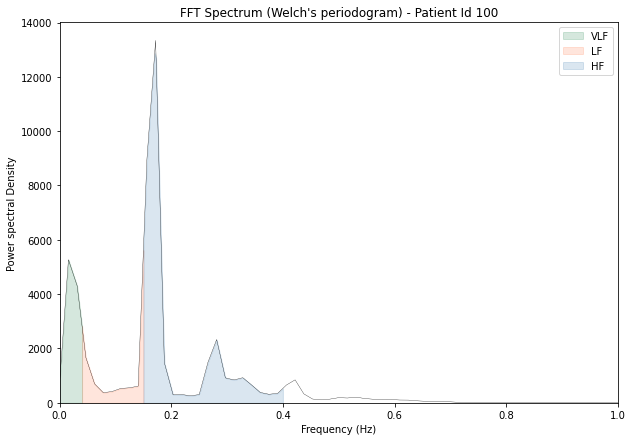

In [17]:
plot_periodogram(f1, pxx1, 1)

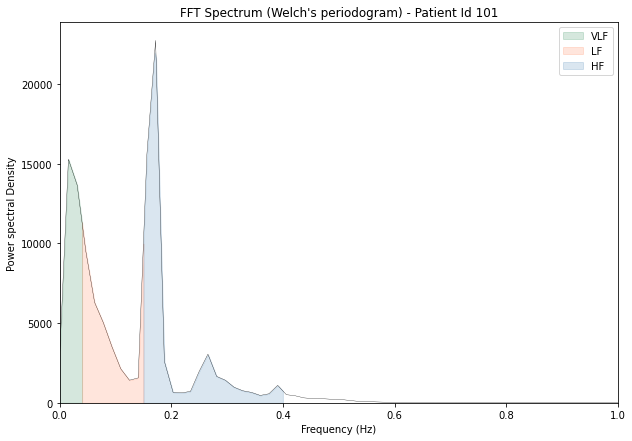

In [18]:
plot_periodogram(f2, pxx2, 2)

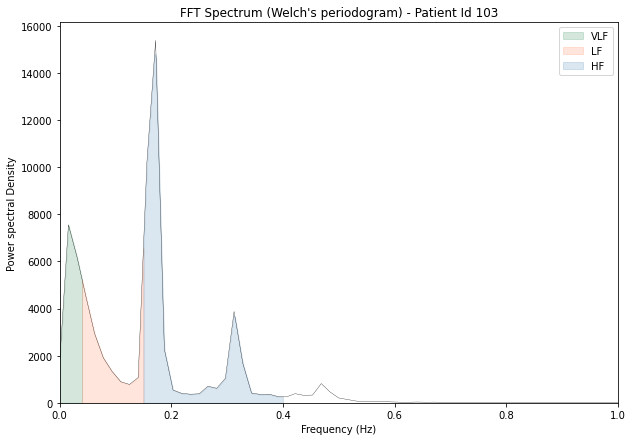

In [19]:
plot_periodogram(f3, pxx3, 3)